In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()

# Save the model
model.save('path_to_saved_model')

# Read the bhaav.csv file
data = pd.read_csv("Bhaav-Dataset.csv")

# Get the sentences from the file
sentences = data["Sentences"]

# Define the emotion labels
emotion_labels = ["joy", "surprise", "anger", "sadness", "neutral"]

# Iterate over each sentence
for sentence in sentences:
    # Tokenize the input text
    tokens = tokenizer.encode_plus(sentence, padding='max_length', truncation=True, max_length=max_length, return_tensors="tf")
    
    # Get the input ids and attention mask
    input_ids = tokens["input_ids"]
    attention_mask = tokens["attention_mask"]
    
    # Make predictions
    outputs = model(inputs=[input_ids, attention_mask])
    probabilities = np.squeeze(outputs)
    
    # Print the input text
    print("Input text:")
    print(sentence)
    
    # Print the predicted emotions with probabilities
    print("Emotion predictions:")
    for label, probability in zip(emotion_labels, probabilities):
        print(label, probability)
    
    print()  # Add a line break between sentences


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

Streaming output truncated to the last 5000 lines.
surprise 0.053400367
anger 0.4291009
sadness 0.039442595
neutral 0.021692237

Input text:
तीसरे दिन दोनों बच्चे दादा-दादी के लिए रोते-रोते बैठके में जा पहुँचे
Emotion predictions:
joy 0.5096908
surprise 0.06872279
anger 0.36193985
sadness 0.04558736
neutral 0.014059218

Input text:
वहाँ एक आले पर खरबूजा कटा हुआ पड़ा था
Emotion predictions:
joy 0.34419796
surprise 0.13676499
anger 0.3910305
sadness 0.09565886
neutral 0.032347754

Input text:
इन पर मक्खियाँ भिनक रही थीं
Emotion predictions:
joy 0.35785696
surprise 0.09214221
anger 0.39219162
sadness 0.12939045
neutral 0.028418766

Input text:
जानकी ने एक तिपाई पर चढ़कर दोनों चीजें उतार लीं और दोनों ने मिलकर खायीं
Emotion predictions:
joy 0.4799651
surprise 0.060644776
anger 0.35352847
sadness 0.07250343
neutral 0.03335825

Input text:
शाम होते-होते दोनों को हैजा हो गया और दोनों माँ-बाप को रोता छोड़ चल बसे
Emotion predictions:
joy 0.43970633
surprise 0.070285484
anger 0.43321744
sadness 0

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()

# Save the model
model.save('path_to_saved_model')

# Read the bhaav.csv file
data = pd.read_csv("Bhaav-Dataset.csv")

# Get the sentences from the file
sentences = data["Sentences"]

# Define the emotion labels
emotion_labels = ["joy", "surprise", "anger", "sadness", "neutral"]

# Iterate over each sentence
for sentence in sentences:
    # Tokenize the input text
    tokens = tokenizer.encode_plus(sentence, padding='max_length', truncation=True, max_length=max_length, return_tensors="tf")
    
    # Get the input ids and attention mask
    input_ids = tokens["input_ids"]
    attention_mask = tokens["attention_mask"]
    
    # Make predictions
    outputs = model(inputs=[input_ids, attention_mask])
    probabilities = np.squeeze(outputs)
    probabilities = probabilities / np.sum(probabilities)  # Normalize probabilities
    
    # Print the input text
    print("Input text:")
    print(sentence)
    
    # Print the predicted emotions with probabilities
    print("Emotion predictions:")
    for label, probability in zip(emotion_labels, probabilities):
        print(label, probability * 100)
    
    predicted_emotion = emotion_labels[np.argmax(probabilities)]
    print("Predicted Emotion:", predicted_emotion)
    
    print()  # Add a line break between sentences



Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

Streaming output truncated to the last 5000 lines.
Input text:
खेतों में कौए पंचायत कर रहे थे
Emotion predictions:
joy 19.384942948818207
surprise 25.339949131011963
anger 5.609457194805145
sadness 14.898364245891571
neutral 34.767282009124756
Predicted Emotion: neutral

Input text:
विवादग्रस्त विषय था यह कि मटर की फलियों पर उनका कोई स्वत्व है या नहीं, और जब तक यह प्रश्न हल न हो जाय, तब तक वे रखवाले की पुकार पर अपनी अप्रसन्नता प्रकट करना आवश्यक समझते थे
Emotion predictions:
joy 29.16133403778076
surprise 10.29423251748085
anger 4.020797461271286
sadness 35.503968596458435
neutral 21.019665896892548
Predicted Emotion: sadness

Input text:
पेड़ की डालियों पर बैठी शुक-मंडली में यह प्रश्न छिड़ा हुआ था कि मनुष्यों को उन्हें बेमुरौवत कहने का क्या अधिकार है, जब उन्हें स्वयं अपने मित्रों से दगा करने में भी संकोच नहीं होता
Emotion predictions:
joy 31.721484661102295
surprise 9.884808957576752
anger 2.790355496108532
sadness 37.58145868778229
neutral 18.02189350128174
Predicted Emotion: sadness


KeyboardInterrupt: ignored

#EMOTION RECOGNITION IN HINDI TEXT USING MULTILINGUAL BERT TRANSFORMERS

In [ ]:
!pip install transformers
#installing of the transformer library for accessing of the 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.7 MB/s eta 0:00:00


In [ ]:
import sys
import random
import torch
import torch.nn as nn
import shutil
import numpy as np
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, random_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
import time
import datetime
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [ ]:
import pandas as pd
import csv
import string

In [ ]:
df = pd.read_csv('/content/Bhaav-Dataset.csv',sep=',') #reading the dataset through csv file
df

,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [ ]:
df.groupby('Annotation').count()

,Sentences
Annotation,
0,1464
1,2463
2,3168
3,1512
4,11697


In [ ]:
X=df['Sentences']
y=df['Annotation']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Tokenize the input sentences
X_train_tokens = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_token_type_ids=False
)

# Tokenize the labels
label_list = y_train.unique().tolist()
label_map = {label: i for i, label in enumerate(label_list)}
y_train_tokens = y_train.map(label_map)

# Convert the tokenized input and labels into tensors
X_train_ids = torch.tensor(X_train_tokens['input_ids'])
X_train_masks = torch.tensor(X_train_tokens['attention_mask'])
y_train_ids = torch.tensor(y_train_tokens.values)
train_data = TensorDataset(X_train_ids, X_train_masks, y_train_ids)

# Define the batch size and create the data loader
batch_size = 32
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30)


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

ValueError: ignored

In [ ]:
X_train.shape

(15228,)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")
token_type_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="token_type_ids")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer, token_type_ids=token_type_ids_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer, token_type_ids_layer], outputs=dense_8)

# Print the model summary
model.summary()

# Load the dataset
df = pd.read_csv('/content/Bhaav-Dataset.csv',sep=',')

# Convert the target labels to numeric format
df['Annotation'] = pd.Categorical(df['Annotation'])
df['Annotation'] = df['Annotation'].cat.codes

# Tokenize and pad the input data
inputs = tokenizer(df['Sentences'].tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs['input_ids'][:, np.newaxis], df['Annotation'], random_state=0, train_size=0.75)


# Create the token type ids
train_token_type_ids = np.zeros_like(X_train)
test_token_type_ids = np.zeros_like(X_test)

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit([X_train, train_token_type_ids], y_train, validation_data=([X_test, test_token_type_ids], y_test), epochs=5, batch_size=32)



Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_5 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]',   

TypeError: ignored

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/Bhaav-Dataset.csv', sep=',')
X = df['Sentences']
y = df['Annotation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the training and testing data and convert to input IDs
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length)
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=max_length)

# Create the TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train
)).shuffle(len(X_train)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test
)).batch(32)

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(train_dataset, epochs=10)

# Evaluate the model on the test set
results = model.evaluate(test_dataset)
print("Test accuracy:", results[1])


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


476/476 [==============================] - 440s 812ms/step - loss: 1.2846 - accuracy: 0.5726
Epoch 2/10
476/476 [==============================] - 385s 808ms/step - loss: 1.2611 - accuracy: 0.5759
Epoch 3/10
476/476 [==============================] - 384s 807ms/step - loss: 1.2553 - accuracy: 0.5759
Epoch 4/10
476/476 [==============================] - 384s 806ms/step - loss: 1.2521 - accuracy: 0.5759
Epoch 5/10
476/476 [==============================] - 383s 804ms/step - loss: 1.2497 - accuracy: 0.5759
Epoch 6/10
476/476 [==============================] - 380s 797ms/step - loss: 1.2482 - accuracy: 0.5759
Epoch 7/10
476/476 [==============================] - 375s 788ms/step - loss: 1.2480 - accuracy: 0.5759
Epoch 8/10
476/476 [==============================] - 376s 789ms/step - loss: 1.2481 - accuracy: 0.5759
Epoch 9/10
476/476 [==============================] - 375s 788ms/step - loss: 1.2480 - accuracy: 0.5759
Epoch 10/10
476/476 [==============================] - 375s 787ms/step - lo

ValueError: ignored

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/Bhaav-Dataset.csv', sep=',')
X = df['Sentences']
y = df['Annotation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

# Define the maximum padding length
max_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the training and testing data and convert to input IDs
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length)
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=max_length)

# Create the TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train
)).shuffle(len(X_train)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test
)).batch(32)

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Define the layers of the model
input_ids_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask_layer = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids_layer, attention_mask=attention_mask_layer)[0]
global_max_pooling = tf.keras.layers.GlobalMaxPooling1D()(bert_output)
dense_6 = tf.keras.layers.Dense(128, activation='relu')(global_max_pooling)
dropout_76 = tf.keras.layers.Dropout(0.5)(dense_6)
dense_7 = tf.keras.layers.Dense(32, activation='relu')(dropout_76)
dense_8 = tf.keras.layers.Dense(5, activation='softmax')(dense_7)

# Create the model
model = tf.keras.Model(inputs=[input_ids_layer, attention_mask_layer], outputs=dense_8)

# Print the model summary
model.summary()




Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score,recall_score

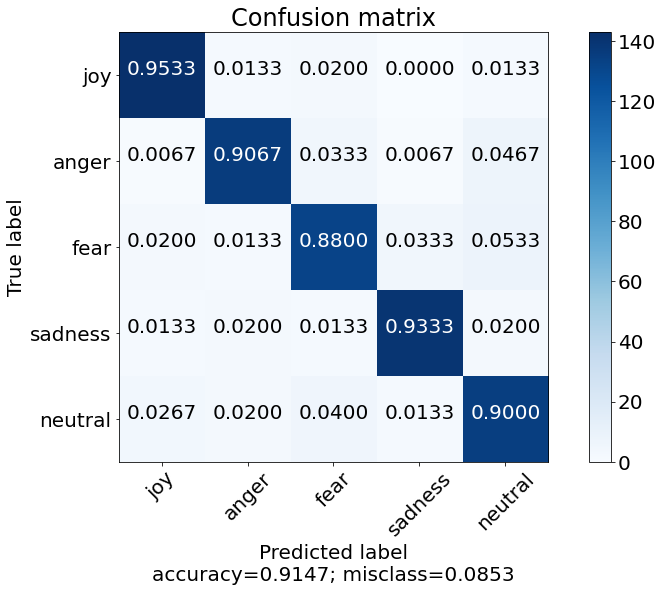

In [ ]:
cm = confusion_matrix(y_test, scores, labels=emotions_labels)
plot_confusion_matrix(cm, emotions_list)